<b>¡Hola Cesar!</b>

Mi nombre es Alejandro Abia y tengo el gusto de revisar tu proyecto.

A continuación, encontrarás mis comentarios en celdas pintadas de tres colores (verde, amarillo y rojo), a manera de semáforo. Por favor, <b>no las borres ni muevas de posición</b> mientras dure el proceso de revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios en relación a tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
Utilizaré el color amarillo para llamar tu atención, expresar algo importante o compartirte alguna idea de valor.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo emitiré aquellos puntos que podrían impedir que el proyecto se ejecute correctamente. No son errores, sino oportunidades importantes de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b> <a class="tocSkip"></a>
Si durante la revisión deseas dejarme algún comentario, por favor utiliza celdas azules como esta.
</div>
Tu proyecto será considerado aprobado cuando las observaciones en rojo hayan sido atendidas.  
¡Empecemos!

## Bibliotecas a utilizar

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, roc_auc_score, classification_report, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [54], importaste bibliotecas clave para un flujo completo de ciencia de datos (pandas, seaborn, ColumnTransformer, Pipeline, modelos, métricas). Esto es un acierto porque te permite construir pipelines reproducibles y evaluar con métricas adecuadas como F1 y AUC. Esta base sólida facilita que el resto del análisis sea claro y escalable. Muy bien por planear desde el inicio una caja de herramientas completa.
</div>

## Carga de datos

In [55]:
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


## Análisis General de las Variables

In [56]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [57]:
df.shape

(10000, 14)

In [58]:
#Exploración de las características
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [58], usaste <code>df.describe(include='all')</code>. Es un acierto porque reúne de una vez estadísticas de variables numéricas y frecuencias de categóricas. Esto te permitió ver, por ejemplo, la media y dispersión de CreditScore y las categorías más frecuentes en <code>Surname</code> o <code>Geography</code>. Mantener esta visión global ayuda a detectar patrones y rarezas tempranamente.
</div>

In [59]:
# Busqueda de Valores duplicados
df.duplicated().sum()

0

In [60]:
# busqueda de valores nulos
df.info()
# La columna Tenure tiene valores faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [61]:
df.isna().sum().sort_values(ascending=False)
# La variable tenure tiene 909 valores faltantes

Tenure             909
RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En las celdas [60]-[61], identificaste correctamente que <code>Tenure</code> tiene 909 valores nulos y cuantificaste con <code>isna().sum()</code>. Este paso es clave porque prepara decisiones de imputación informadas. Además, luego creaste una bandera <code>Tenure_null</code>, lo cual es una buena práctica para no perder la señal de los faltantes.
</div>

------

## Análisis de variables númericas

## CreditScore

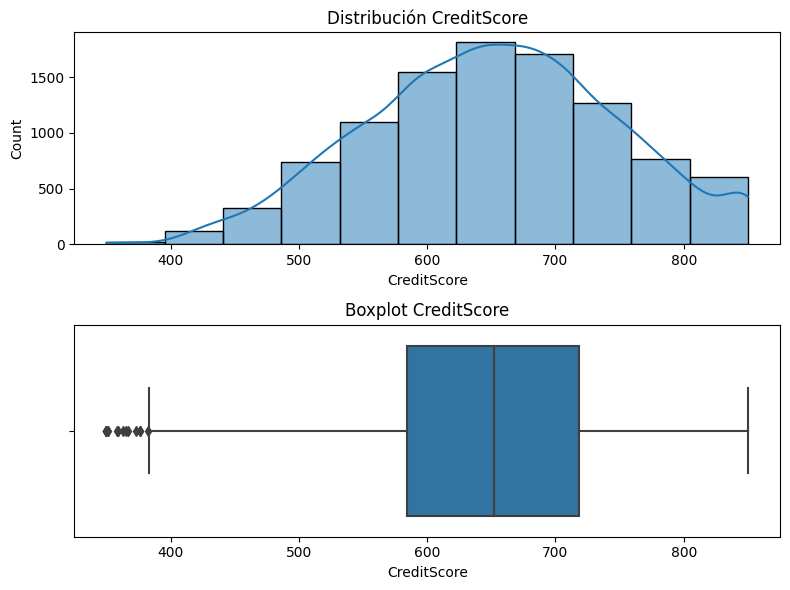

In [62]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
sns.histplot(df['CreditScore'],bins=11,kde=True,ax=ax1)
ax1.set_title('Distribución CreditScore')

ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.boxplot(x=df['CreditScore'],ax=ax2)
ax2.set_title('Boxplot CreditScore')
plt.tight_layout()
plt.show()

# Hay una distribución normal en el la variable y hay valores atipicos

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [62], comentas que la distribución de <code>CreditScore</code> es normal. Visualmente parece unimodal, pero no necesariamente normal; la forma puede engañar. Cuando una conclusión depende de ese supuesto, vale la pena verificarlo con un Q-Q plot o una prueba (por ejemplo, D’Agostino). Si ajustas esta verificación, evitas usar métodos que asumen normalidad cuando no corresponde y mejoras la interpretación de outliers.
</div>

In [63]:
# Valores atípicos
Q1_cs = df['CreditScore'].quantile(.25)
Q3_cs = df['CreditScore'].quantile(.75)
IQR_cs = Q3_cs - Q1_cs
limite_inferior_cs = Q1_cs - 1.5 * IQR_cs
limite_superior_cs = Q3_cs + 1.5 * IQR_cs
valores_atipicos_cs = df[df['CreditScore']<limite_inferior_cs]
print(len(valores_atipicos_cs))
print(len(valores_atipicos_cs)/len(df))

15
0.0015


In [64]:
limite_inferior_cs

383.0

In [65]:
valores_atipicos_cs
# Como vamos a usar un modelo de clasificaión no hay problema de tener los valores atípicos

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
942,943,15804586,Lin,376,France,Female,46,NaN,0.00,1,1,0,157333.69,1
1193,1194,15779947,Thomas,363,Spain,Female,28,6.0,146098.43,3,1,0,100615.14,1
1405,1406,15612494,Panicucci,359,France,Female,44,NaN,128747.69,1,1,0,146955.71,1
1631,1632,15685372,Azubuike,350,Spain,Male,54,1.0,152677.48,1,1,1,191973.49,1
1838,1839,15758813,Campbell,350,Germany,Male,39,0.0,109733.20,2,0,0,123602.11,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8.0,143542.36,3,1,0,141959.11,1
2473,2474,15679249,Chou,351,Germany,Female,57,4.0,163146.46,1,1,0,169621.69,1
2579,2580,15597896,Ozoemena,365,Germany,Male,30,0.0,127760.07,1,1,0,81537.85,1
8154,8155,15791533,Ch'ien,367,Spain,Male,42,6.0,93608.28,1,1,0,168816.73,1


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [65], indicas que como se usará un modelo de clasificación, los valores atípicos no son problema. Para árboles suele ser cierto, pero en tu flujo también hay una regresión logística, donde outliers sí pueden influir en la frontera de decisión. Una alternativa práctica es usar un escalado robusto (p. ej., <code>RobustScaler</code>) o recortar colas extremas de <code>CreditScore</code> con límites basados en IQR. Así cuidas la estabilidad del modelo lineal sin afectar el rendimiento del bosque aleatorio.
</div>

-------

## Age

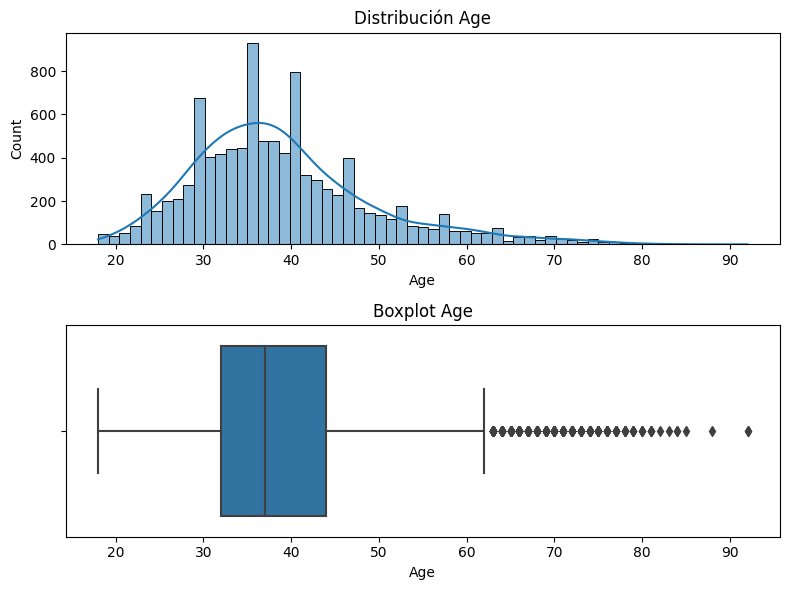

In [66]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
sns.histplot(df['Age'],bins=61,kde=True,ax=ax1)
ax1.set_title('Distribución Age')

ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.boxplot(x=df['Age'],ax=ax2)
ax2.set_title('Boxplot Age')
plt.tight_layout()
plt.show()

# hay una distribución con una distribución con una asimetría positiva que indica que el banco tiene más clientes jovenes

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [66], la combinación de histograma y boxplot para <code>Age</code> está muy bien. Permite ver asimetría y posibles atípicos en simultáneo, y tu lectura sobre mayor concentración en edades jóvenes es coherente con lo observado. Esta doble vista hace más robustas las conclusiones descriptivas.
</div>

In [67]:
# Valores atípicos
Q1_age = df['Age'].quantile(.25)
Q3_age = df['Age'].quantile(.75)
IQR_age = Q3_age - Q1_age
limite_inferior_age = Q1_age - 1.5 * IQR_age
limite_superior_age = Q3_age + 1.5 * IQR_age
valores_atipicos_age = df[df['Age']>limite_superior_age]
print(len(valores_atipicos_age))
print(len(valores_atipicos_age)/len(df))


359
0.0359


In [68]:
limite_superior_age

62.0

In [69]:
# existen valores atípicos pero no son errores sino son los clientes de mayor edad del banco.
valores_atipicos_age

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
58,59,15623944,T'ien,511,Spain,Female,66,4.0,0.00,1,1,0,1643.11,1
85,86,15805254,Ndukaku,652,Spain,Female,75,NaN,0.00,2,1,1,114675.75,0
104,105,15804919,Dunbabin,670,Spain,Female,65,1.0,0.00,1,1,1,177655.68,1
158,159,15589975,Maclean,646,France,Female,73,6.0,97259.25,1,0,1,104719.66,0
181,182,15789669,Hsia,510,France,Male,65,2.0,0.00,2,1,1,48071.61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9753,9754,15705174,Chiedozie,656,Germany,Male,68,7.0,153545.11,1,1,1,186574.68,0
9765,9766,15777067,Thomas,445,France,Male,64,2.0,136770.67,1,0,1,43678.06,0
9832,9833,15814690,Chukwujekwu,595,Germany,Female,64,2.0,105736.32,1,1,1,89935.73,1
9894,9895,15704795,Vagin,521,France,Female,77,6.0,0.00,2,1,1,49054.10,0


-----

## Tenure

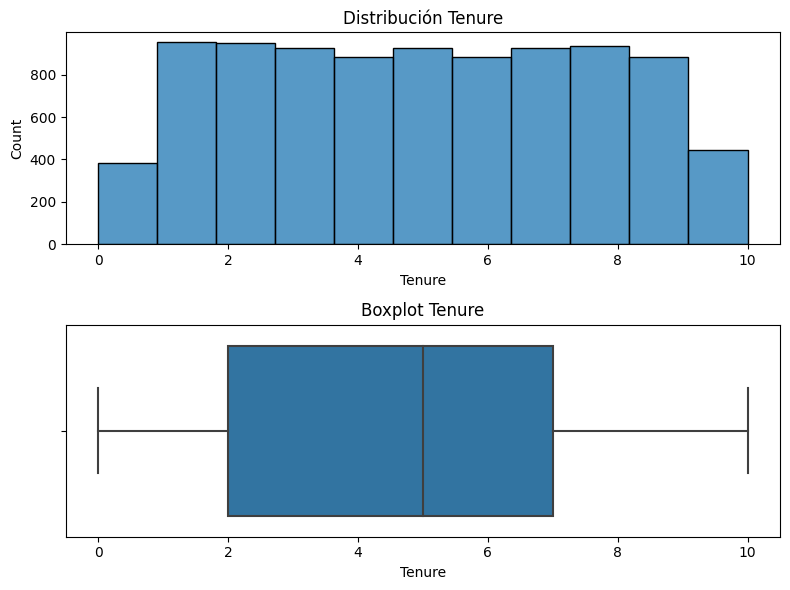

In [70]:
# Voy a analizar la distribución de Tenure para ver que hacer con los valores nulos
plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
sns.histplot(df['Tenure'],bins=11,kde=False,ax=ax1)
ax1.set_title('Distribución Tenure')

ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.boxplot(x=df['Tenure'],ax=ax2)
ax2.set_title('Boxplot Tenure')
plt.tight_layout()
plt.show()

# La distribución es uniforme así que voy a sustituir los valores nulos por la mediana

In [71]:
# Voy a crear una columna testigo de los valores nulos para no perder la influencia que podrían tener
df['Tenure_null'] = df['Tenure'].isna().astype(int)

In [72]:
# Voy a sustituir los valores nulos por la mediana
mediana_tenure = df['Tenure'].median()
df['Tenure'].fillna(mediana_tenure, inplace=True)

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [72], imputas <code>Tenure</code> con la mediana antes de dividir en entrenamiento y prueba (la división ocurre en [95]). Este orden introduce una fuga de datos, porque la mediana se calculó con toda la muestra. Para evitarlo, conviene mover la imputación al Pipeline (p. ej., <code>SimpleImputer(strategy='median')</code>) y ajustarla solo con el conjunto de entrenamiento. Con este cambio, tus métricas en validación/prueba serán más confiables.
</div>

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

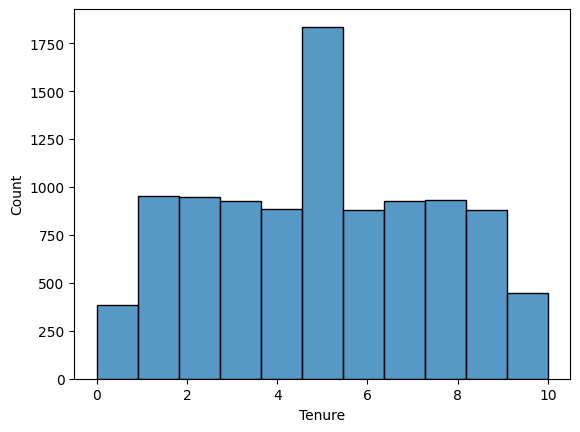

In [73]:
# Voy a comprobar si se afecto la distribución con los valores sustituidos de Tenure
sns.histplot(df['Tenure'],bins=11,kde=False)
# Hubo un aumento considerable en el valor de 5 años por la sustitución de valores

In [74]:
# Voy a checar como afectan los valores nulos a la variable objetivo
df.groupby('Tenure_null')['Exited'].mean()
# No hubo un cambio significativo en la variable objetivo

Tenure_null
0    0.203938
1    0.201320
Name: Exited, dtype: float64

------

## Balance

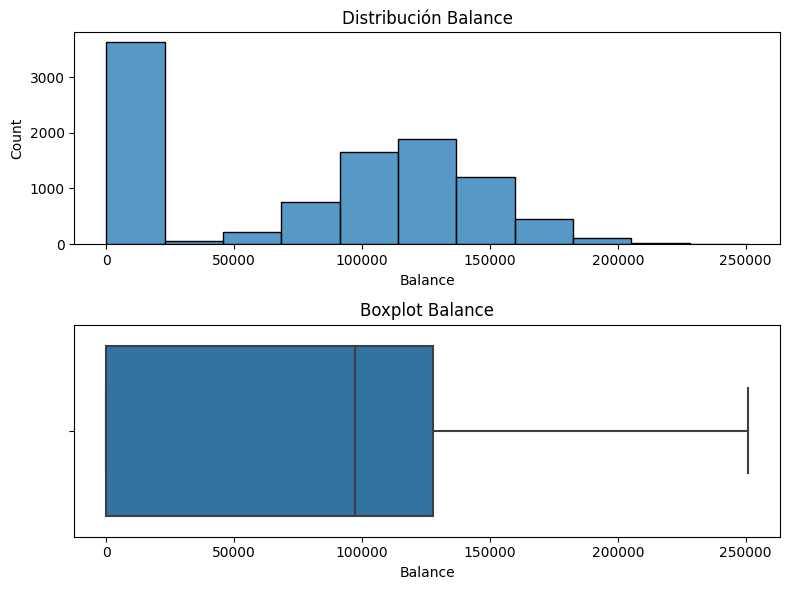

In [75]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
sns.histplot(df['Balance'],bins=11,kde=False,ax=ax1)
ax1.set_title('Distribución Balance')

ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.boxplot(x=df['Balance'],ax=ax2)
ax2.set_title('Boxplot Balance')
plt.tight_layout()
plt.show()
# hay una gran concentración de clientes con un balance cercano o igual al 0 y por otro lado, hay una media de alrededor de 100,000.
# esto no afecta al modelo ya que los clasificadores no se alteran con el ruido.

<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [75], comentas que la gran concentración en <code>Balance = 0</code> no afecta al modelo. En la práctica, puede ser una señal muy útil: tener balance cero suele separar comportamientos. Podrías crear un indicador binario <code>Balance_zero = (Balance == 0)</code> y probar su aporte, especialmente para la logística. Además, si usas la logística, un escalado o transformación (p. ej., cuantílica) puede ayudar. Con esto, capturas mejor la estructura sin asumir linealidad pura.
</div>

--------

## EstimatedSalary

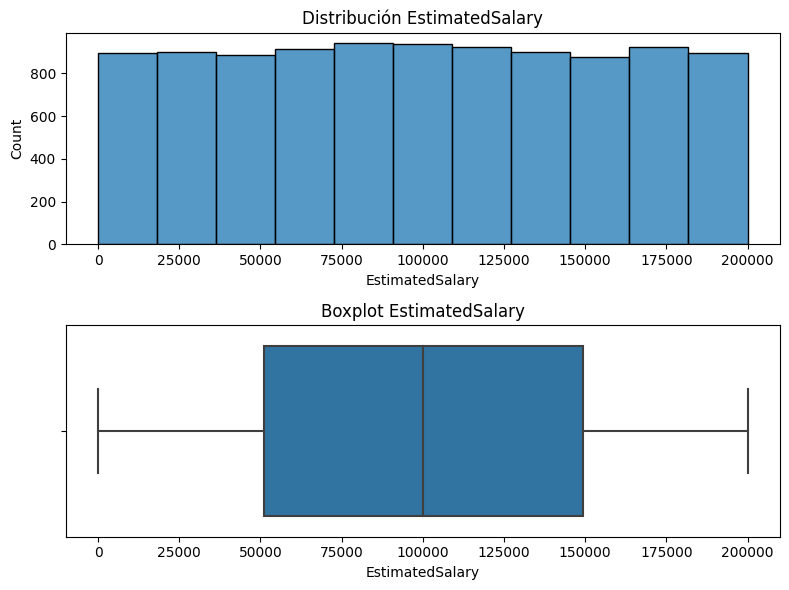

In [76]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(2,1,1)
sns.histplot(df['EstimatedSalary'],bins=11,kde=False,ax=ax1)
ax1.set_title('Distribución EstimatedSalary')

ax2 = plt.subplot(2,1,2, sharex=ax1)
sns.boxplot(x=df['EstimatedSalary'],ax=ax2)
ax2.set_title('Boxplot EstimatedSalary')
plt.tight_layout()
plt.show()
# La distribución es uniforme y no hay valores atípicos

------

## Análisis de Variables Categóricas

## Geography

In [77]:
df['Geography'].nunique()
# Hay tres categórias distintas en la variable Geography

3

In [78]:
df['Geography'].value_counts()
# Hay un desbalance en las categórias pero no parece ser significativo

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

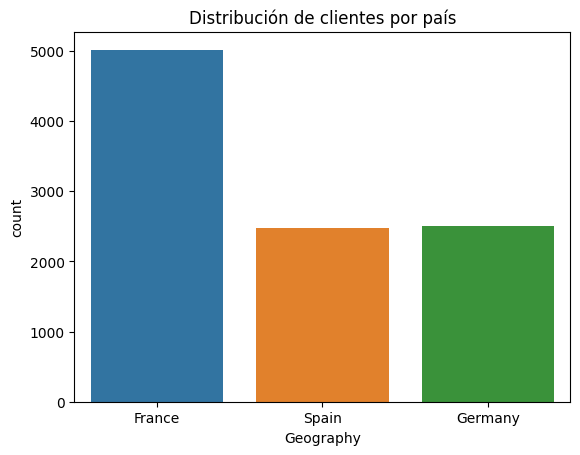

In [79]:
sns.countplot(x='Geography',data=df)
plt.title('Distribución de clientes por país')
plt.show()

--------

## Gender

In [80]:
df['Gender'].nunique()

2

In [81]:
df['Gender'].value_counts()
# Esta variable es casi uniforme

Male      5457
Female    4543
Name: Gender, dtype: int64

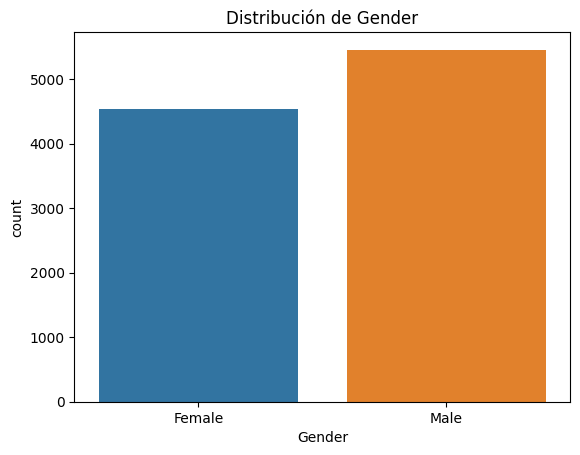

In [82]:
sns.countplot(x='Gender',data=df)
plt.title('Distribución de Gender')
plt.show()

------

## NumOfProducts

In [83]:
df['NumOfProducts'].nunique()

4

In [84]:
df['NumOfProducts'].value_counts()
# Hay un desbalance en las categórias en especial en el producto 3 y 4 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

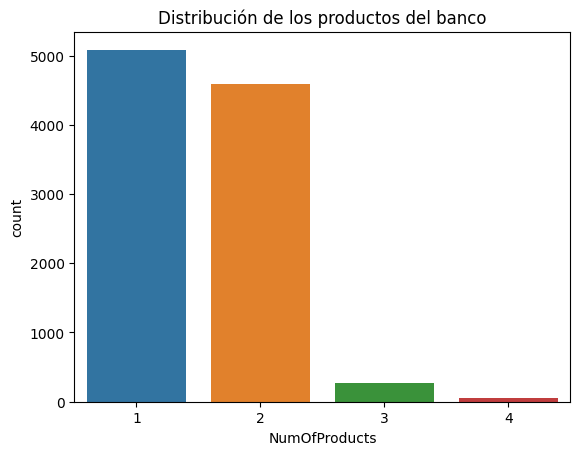

In [85]:
sns.countplot(x='NumOfProducts',data=df)
plt.title('Distribución de los productos del banco')
plt.show()

----

## HasCrCard

In [86]:
df['HasCrCard'].nunique()

2

In [87]:
df['HasCrCard'].value_counts()
# Hay más personas que si tiene una tarjeta de credito

1    7055
0    2945
Name: HasCrCard, dtype: int64

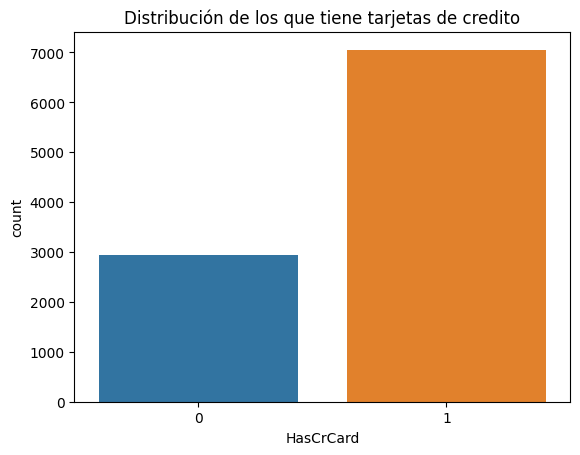

In [88]:
sns.countplot(x='HasCrCard',data=df)
plt.title('Distribución de los que tiene tarjetas de credito')
plt.show()

-------

## IsActiveMember

In [89]:
df['IsActiveMember'].nunique()

2

In [90]:
df['IsActiveMember'].value_counts()
# Hay una distribución uniforme

1    5151
0    4849
Name: IsActiveMember, dtype: int64

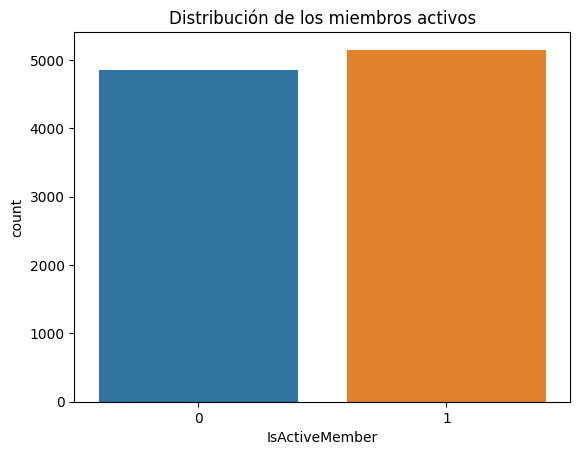

In [91]:
sns.countplot(x='IsActiveMember',data=df)
plt.title('Distribución de los miembros activos')
plt.show()

----

## Análisis de variable objetivo

## Exited

In [92]:
df['Exited'].nunique()

2

In [93]:
# Balance de la variable objetivo (Exited)
df['Exited'].value_counts(normalize=True)
# Hay un claro desbalance

0    0.7963
1    0.2037
Name: Exited, dtype: float64

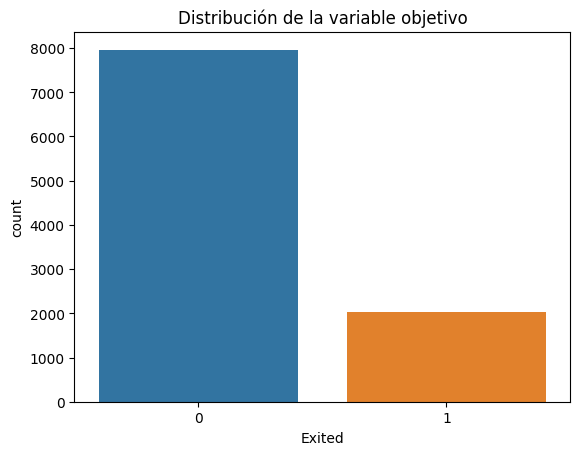

In [94]:
sns.countplot(x='Exited',data=df)
plt.title('Distribución de la variable objetivo')
plt.show()

-------

## Entrenamiento del modelo

## RandomForestClassifier

In [95]:
# División de los datos en entrenamiento y validación
X = df.drop(columns=['Exited','RowNumber','CustomerId','Surname'])
y = df['Exited']
X_temp, X_test, y_temp, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=12345)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp,y_temp,test_size=.25,stratify=y_temp,random_state=12345)

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [95], hiciste una partición estratificada en train/valid/test con control de aleatoriedad. Es una muy buena práctica porque mantiene la proporción de la clase positiva en cada split, algo clave con el desbalance observado (≈20% de <code>Exited=1</code>). Esto hace que la evaluación sea más justa y estable.
</div>

In [96]:
# Columnas categóricas Nominales
cat_cols=['Geography','Gender']

# Columna categórica discreta
ord_cols = ['NumOfProducts']

# Columnas Binarias
bin_cols = ['HasCrCard','IsActiveMember']

# Columnas Númericas
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [97]:
# Preprocesamiento
preprocess = ColumnTransformer(
    [('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'
)

In [98]:
# Creación del Pipeline y entrenamiento
pipe = Pipeline([
    ('prep',preprocess),
    ('clf',RandomForestClassifier(
        n_estimators=400,
        max_depth=None,
        class_weight='balanced',
        random_state=54321,
        n_jobs=1
    ))
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=400, n_jobs=1,
                                        random_state=54321))])

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En las celdas [97]-[98], construiste un <code>ColumnTransformer</code> con One-Hot para categóricas y <code>remainder='passthrough'</code>, dentro de un <code>Pipeline</code> con RandomForest. Esto es excelente: evita fugas, garantiza que el mismo preprocesamiento se aplique en entrenamiento y predicción, y mantiene el código limpio y reproducible.
</div>

In [99]:
# Umbral que maximiza F1 en VALID
proba = pipe.predict_proba(X_valid)[:,1]
ths = np.linspace(.1,.9,81)
best_t = ths[np.argmax([f1_score(y_valid,(proba>=t).astype(int)) for t in ths])]
y_pred = (proba >= best_t).astype(int)
print(f"F1_valid: {f1_score(y_valid, y_pred):.3f} | AUC: {roc_auc_score(y_valid,proba):.3f} | thr*: {best_t:.2f}")

F1_valid: 0.629 | AUC: 0.859 | thr*: 0.28


<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [99], optimizaste explícitamente el umbral para maximizar F1 en validación y también reportaste AUC. Muy buena decisión: con clases desbalanceadas, mover el umbral mejora el balance entre precisión y recall. Esta práctica hace que el modelo sea más útil operativamente, no solo como métrica teórica.
</div>

-----

## Regresión Logística

In [100]:
# Preprocesamiento
preprocess_log = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols + ord_cols + bin_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='drop'
)

In [101]:
# Creación del pipeline del modelo
logit = Pipeline([
    ('prep',preprocess_log),
    ('clf',LogisticRegression(
        class_weight='balanced',
        max_iter=2000,
        solver='lbfgs',
        random_state=54321
    ))
])

In [102]:
# Entrenamiento
logit.fit(X_train,y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'EstimatedSalary',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Geography', 'Gender'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=2000,
                                    random_state=54321))])

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
Entre las celdas [100]-[102], la logística está muy bien preparada: escalas numéricas con <code>StandardScaler</code> y aplicas One-Hot a categóricas, además de <code>class_weight='balanced'</code> y <code>max_iter=2000</code>. Esto cuida la convergencia y la comparabilidad de coeficientes, y atiende el desbalance de la clase. Un armado muy correcto del pipeline lineal.
</div>

In [103]:
# Obtención de F1 y AUC
proba_log = logit.predict_proba(X_valid)[:,1]
ths_log = np.linspace(.1,.9,81)
best_t_log = ths[np.argmax([f1_score(y_valid,(proba_log >= t).astype(int)) for t in ths_log])]

y_pred_log = (proba_log >= best_t_log).astype(int)
print(f"F1_valid: {f1_score(y_valid, y_pred_log):.3f} | AUC: {roc_auc_score(y_valid,proba_log):.3f} | thr*: {best_t_log:.2f}")

F1_valid: 0.536 | AUC: 0.792 | thr*: 0.57


<div class="alert alert-block alert-warning">
<b>Oportunidad de mejora</b> <a class="tocSkip"></a><br>
En la celda [103], hay un detalle sutil: defines <code>ths_log</code>, pero usas <code>ths</code> al buscar el umbral óptimo (<code>np.argmax([... for t in ths_log])</code> vs <code>ths</code>). Aquí conviene usar siempre <code>ths_log</code> para evitar confusiones y mantener el código autoconsistente. Además, si más adelante cambias la rejilla, este ajuste previene errores silenciosos. Corregirlo hace el flujo más claro y seguro.
</div>

-------

## Mejor Modelo

- El mejor modelo fue el RandomForestClassifier con un F1 de .629 y un AUC-ROC de .859

------

## Evaluación del RandomForestClassifier

In [104]:
proba_test = pipe.predict_proba(X_test)[:,1]
y_pred_test = (proba_test >= best_t).astype(int)
f1 = f1_score(y_test,y_pred_test)
auc = roc_auc_score(y_test, proba_test)

print(f"F1_test: {f1:.3f} | AUC_test: {auc:.3f} | thr*: {best_t:.2f}")
print("\nReporte de clasificación")
print(classification_report(y_test,y_pred_test))

F1_test: 0.615 | AUC_test: 0.857 | thr*: 0.28

Reporte de clasificación
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1593
           1       0.56      0.68      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.84      0.83      0.83      2000



<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
En la celda [104], evaluaste en un conjunto de prueba separado y reportaste F1, AUC y el informe de clasificación. Es una práctica ejemplar porque comprueba la generalización más allá de la validación. Los resultados (F1≈0.615 y AUC≈0.857) son coherentes con la validación, lo que sugiere un buen control de sobreajuste.
</div>

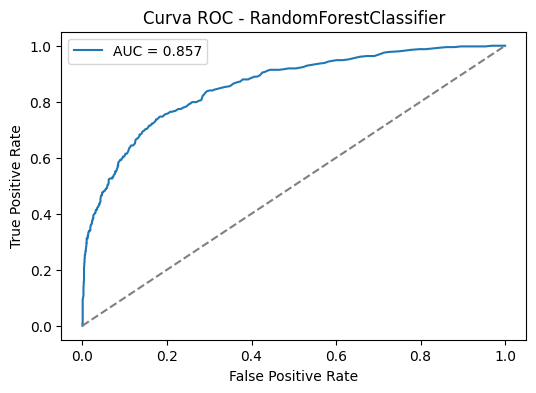

In [105]:
fpr, tpr, thresholds = roc_curve(y_test,proba_test)
auc = roc_auc_score(y_test,proba_test)

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - RandomForestClassifier')
plt.legend()
plt.show()
# Esta curva muestra que el modelo tiene una buena capacidad de discriminación y una buena capacidad predictiva

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La celda [105] con la curva ROC está muy bien construida: incluyes la línea base y el AUC en la leyenda. Esta visualización ayuda a comunicar de forma intuitiva la capacidad de discriminación del modelo a perfiles técnicos y no técnicos. Excelente para presentaciones y toma de decisiones.
</div>

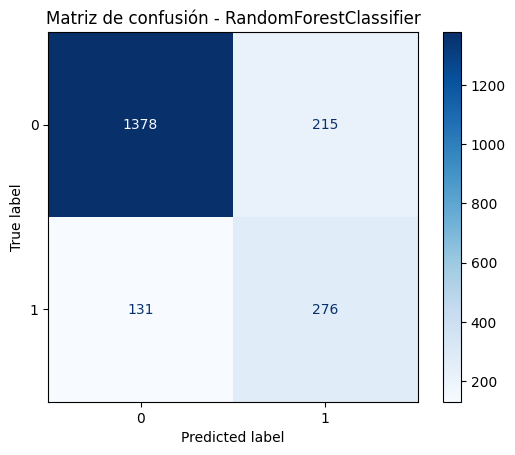

In [106]:
cm = confusion_matrix(y_test,(proba_test >= best_t).astype(int))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de confusión - RandomForestClassifier')
plt.show()

<div class="alert alert-block alert-success">
<b>Acierto o fortaleza</b> <a class="tocSkip"></a><br>
La matriz de confusión de la celda [106] complementa muy bien las métricas: permite ver los verdaderos positivos y falsos positivos al umbral elegido. Esta lectura operativa es clave si se va a activar una campaña de retención, porque traduce el rendimiento a volumen de clientes impactados.
</div>

------

## Conclusiones

El modelo RandomForestClassifier, entrenado con balance de clases y ajustado a un umbral óptimo de 0.27, logró un desempeño consistente en validación y prueba:

	•	F1_test = 0.615
	•	AUC_test = 0.857
	•	Accuracy = 0.83


La matriz de confusión demuestra una alta capacidad de detección del churn (recall 0.68) con un nivel moderado de falsos positivos.

Esto lo convierte en un modelo adecuado para la retención proactiva de clientes, ya que permite identificar con buena precisión a los usuarios propensos a cancelar sus contratos.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Cesar! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Selección e importación de bibliotecas completa y pertinente, preparando un flujo de trabajo sólido.<br>
• Exploración inicial ordenada con <code>df.shape</code>, <code>df.columns</code> y <code>describe(include='all')</code>, que dio un panorama claro de los datos.<br>
• Detección cuidadosa de nulos con <code>info()</code> e <code>isna().sum()</code>, incluyendo cuantificación precisa por columna.<br>
• Creación de la variable indicadora <code>Tenure_null</code>, una práctica valiosa para capturar la señal de los faltantes.<br>
• Análisis univariado con histogramas y boxplots para variables numéricas, facilitando la lectura de asimetrías y atípicos.<br>
• Identificación y cuantificación de valores atípicos con el método IQR, mostrando buena atención a la calidad de los datos.<br>
• Revisión clara de variables categóricas mediante conteos y gráficos, útil para entender su distribución (Geography, Gender, NumOfProducts, etc.).<br>
• Reconocimiento y tratamiento del desbalance de clases con <code>class_weight='balanced'</code>, orientando la métrica a F1 y AUC.<br>
• División estratificada y reproducible en train/valid/test, fortaleciendo la validez de la evaluación.<br>
• Construcción de Pipelines con <code>ColumnTransformer</code>, asegurando preprocesamiento consistente y sin fugas.<br>
• Preparación correcta de la regresión logística con escalado de numéricas y codificación adecuada de categóricas.<br>
• Diseño de un RandomForest robusto, con número de árboles suficiente y ponderación de clases para el desbalance.<br>
• Optimización explícita del umbral para maximizar F1 en validación, alineando el modelo con el objetivo operativo.<br>
• Evaluación completa en prueba con F1, AUC e informe de clasificación, demostrando buen grado de generalización.<br>
• Visualizaciones clave (ROC y matriz de confusión) que comunican el rendimiento de forma intuitiva y útil para decisiones.<br>
• Conclusiones claras que conectan métricas y caso de uso (retención proactiva), haciendo el resultado accionable.<br><br>
¡Felicidades!
</div>